In [1]:
import sys
sys.path.append('../')
from settings import *
from scripts.standarise_data import *

import pandas as pd
import numpy as np

data_path_net = '../data/processed/MolecularNetwork/'
data_path_ms = '../data/processed/MS2MassBank/'

Importing the processed sample features, the network mass spectra, and tox dictionary

In [ ]:
from matchms.importing import load_from_msp
spectrums_features = list(load_from_msp(data_path_ms + MSrawdata + '_sample_features.msp'))
spectrums_net = list(load_from_msp(data_path_ms + MSrawdata + '_net.msp'))

In [3]:
import networkx as nx
network = nx.read_graphml(data_path_net + MSrawdata+"_tol"+str(cosine_tolerance)+"_cutoff"+str(cutoff)+"_links"+str(links)+".graphml")

In [4]:
tox_dict = pd.read_csv('../data/processed/tox21/tox.csv').set_index('inchikey').to_dict(orient='index')

Examining the sample features

In [51]:
from matchms.similarity import CosineGreedy
from matchms import calculate_scores
from datetime import datetime, date, time
alerts_feature_id=[]
for f in spectrums_features:
    print('Feature ID: ', f.get('id'))
    connected_active=0
    connected_inactive=0

    try:
        similarity_measure = CosineGreedy(tolerance=0.1)
        scores_f = calculate_scores([f], spectrums_net, similarity_measure, is_symmetric=False)
        scores_array_f = scores_f.scores.to_array()
    except Exception as e:
        print(f"Error processing spectrum {f}: {e}. Calculate_scores returns empty as index if there is not any matched peaks.")
        continue  
    
    filtered_indexes = np.where(np.logical_and(scores_array_f[0]['CosineGreedy_matches'] >= 3, scores_array_f[0]['CosineGreedy_score'] >= 0.2))
    
    for index in filtered_indexes[0]:
        inchikey = spectrums_net[index].get('inchikey')
        activity = tox_dict[inchikey]['NR.AR']
        print(inchikey)
        print(activity)
        if activity == 1:
            connected_active += 1 
        if activity == 0:
            connected_inactive += 1
    print('connected_active',connected_active)
    print('connected_inactive',connected_inactive)
    if connected_active >= connected_inactive and connected_active!= 0:        
        print(' Alert: active connected nodes equal or greater than inactive nodes')
        alerts_feature_id.append(f.get('id'))
    print()

Feature ID:  7
MXJWRABVEGLYDG-UHFFFAOYSA-N
0.0
CZZZABOKJQXEBO-UHFFFAOYSA-N
nan
JJJPNTQYUJPWGQ-UHFFFAOYSA-N
0.0
HBBVCKCCQCQCTJ-UHFFFAOYSA-N
0.0
AQIIVEISJBBUCR-UHFFFAOYSA-N
0.0
NPAGDVCDWIYMMC-IZPLOLCNSA-N
1.0
connected_active 1
connected_inactive 4

Feature ID:  9
HBBVCKCCQCQCTJ-UHFFFAOYSA-N
0.0
DOMWKUIIPQCAJU-LJHIYBGHSA-N
nan
PDMMFKSKQVNJMI-BLQWBTBKSA-N
1.0
NPAGDVCDWIYMMC-IZPLOLCNSA-N
1.0
connected_active 2
connected_inactive 1
 Alert: active connected nodes equal or greater than inactive nodes

Feature ID:  16
connected_active 0
connected_inactive 0

Feature ID:  22
DIOYAVUHUXAUPX-KHPPLWFESA-N
0.0
MAUFTTLGOUBZNA-UHFFFAOYSA-N
0.0
IOUNQDKNJZEDEP-UHFFFAOYSA-N
0.0
connected_active 0
connected_inactive 3

Feature ID:  25
connected_active 0
connected_inactive 0

Feature ID:  27
BSYNRYMUTXBXSQ-UHFFFAOYSA-N
0.0
connected_active 0
connected_inactive 1

Feature ID:  31
connected_active 0
connected_inactive 0

Feature ID:  33
connected_active 0
connected_inactive 0

Feature ID:  35
connected_acti

In [47]:
alerts_feature_id

['9',
 '44',
 '69',
 '109',
 '147',
 '229',
 '295',
 '300',
 '400',
 '410',
 '480',
 '488',
 '489',
 '681',
 '817',
 '835',
 '1225',
 '1285',
 '1382']

Plotting spectra

For example, Feature ID 9 is marked but not ID 186, for the conditions of ['CosineGreedy_matches'] >= 3, scores_array_f[0]['CosineGreedy_score'] >= 0.2

```
Feature ID:  9  
HBBVCKCCQCQCTJ-UHFFFAOYSA-N  
0.0  
DOMWKUIIPQCAJU-LJHIYBGHSA-N  
nan  
PDMMFKSKQVNJMI-BLQWBTBKSA-N  
1.0  
NPAGDVCDWIYMMC-IZPLOLCNSA-N  
1.0  
connected_active 2  
connected_inactive 1  
 Alert: active connected nodes equal or greater than inactive nodes
```

```
Feature ID:  186
IRIAEXORFWYRCZ-UHFFFAOYSA-N
0.0
PWZDJIUQHUGFRJ-UHFFFAOYSA-N
nan
FMGSKLZLMKYGDP-USOAJAOKSA-N
0.0
.
.
.
POPFMWWJOGLOIF-XWCQMRHXSA-N
1.0
YREQHYQNNWYQCJ-UHFFFAOYSA-N
0.0
NPAGDVCDWIYMMC-IZPLOLCNSA-N
1.0
connected_active 7
connected_inactive 11
```




index: 282
index: 1


(<Figure size 1600x600 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

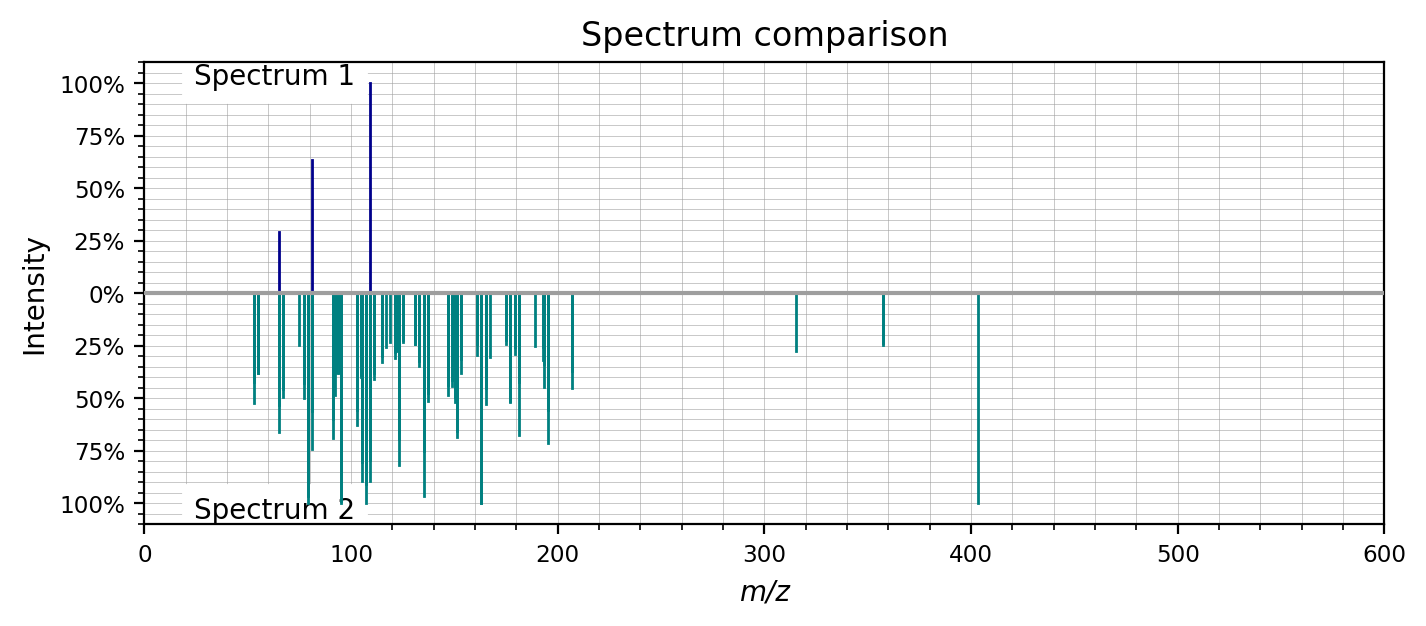

In [35]:
id_feature_sample='9' #upper side of the plot
inchikey_network='HBBVCKCCQCQCTJ-UHFFFAOYSA-N' ##bottom

i_net=index_inchikey(spectrums_net,inchikey_network)
i_sample=index_id(spectrums_features,id_feature_sample)

spectrums_features[i_sample].plot_against(spectrums_net[i_net],figsize=(8, 3), dpi=200)

index: 158
index: 74


(<Figure size 1600x600 with 1 Axes>,
 <Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>)

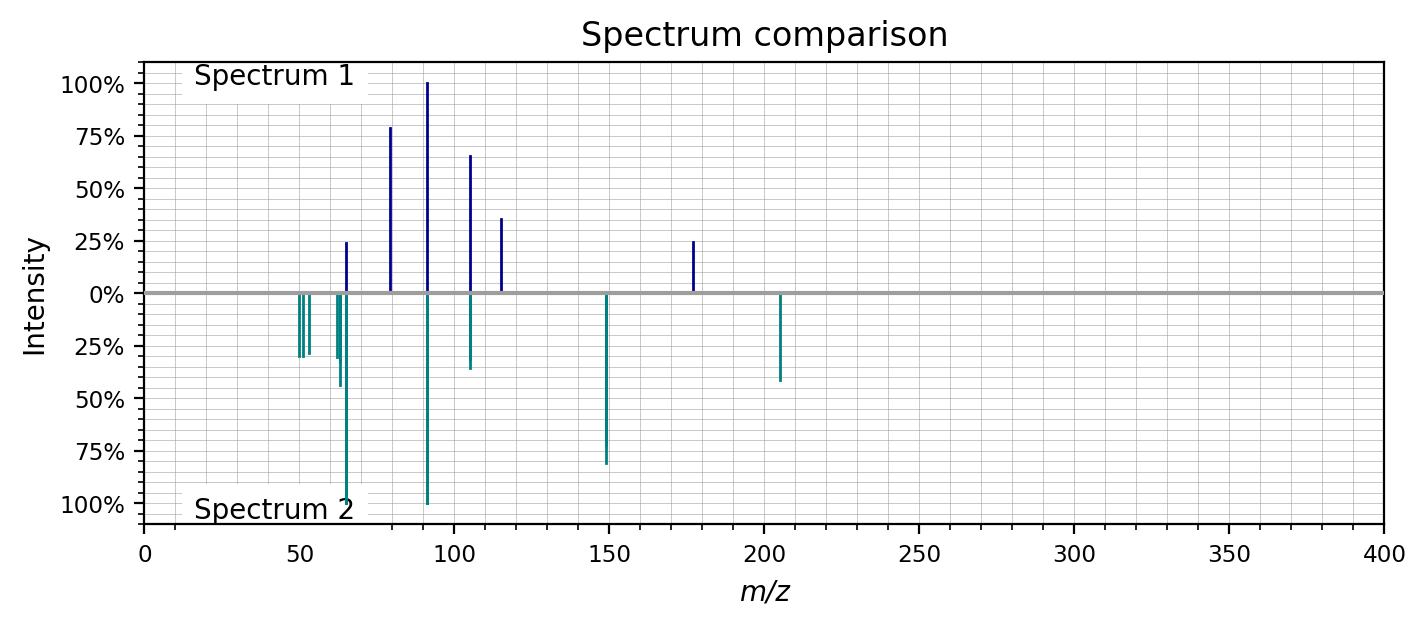

In [50]:
id_feature_sample='186' #upper side of the plot
inchikey_network='IRIAEXORFWYRCZ-UHFFFAOYSA-N' ##bottom

i_net=index_inchikey(spectrums_net,inchikey_network)
i_sample=index_id(spectrums_features,id_feature_sample)

spectrums_features[i_sample].plot_against(spectrums_net[i_net],figsize=(8, 3), dpi=200)